# Mental Health Assessment Classification Using Neural Network

1)Data Collection and Organization.

   -Gather your raw images and organize them into a structured folder hierarchy.
   
   -Use Roboflow to upload your images and annotations, if available, and organize them into datasets.

2)Data Preprocessing:

   -Roboflow provides tools for preprocessing images, such as resizing, cropping, and adjusting image quality. You can apply these preprocessing            techniques to ensure uniformity and optimize the images for training.

3)Data Augmentation:

   -Roboflow offers a wide range of data augmentation options to increase the variability of your dataset. These include transformations like flipping,     rotation, scaling, translation, and introducing noise.
   
   -Experiment with different augmentation techniques to enhance the robustness of your model and improve its performance on unseen data.
    Exporting the Dataset:

Once processed and augmented  dataset to satisfaction, export it from Roboflow in the format suitable for YOLOv8 training.

Training YOLOv8:
   -Follow the steps outlined previously for configuring, training, and evaluating the YOLOv8 model using TensorFlow.
    Use the exported dataset from Roboflow as input to the training pipeline.

### IMPORTNG LIBRARIES

In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy

### Converting Images To Tensors To Visualize and See Number of Classes 

In [38]:
'''
Use the image_dataset_from_directory function to load the dataset.
The subset parameter is set to 'training' to get the training dataset.
The validation_split parameter is set to 0.2 to split 20% of the data for validation
'''

train_ds = image_dataset_from_directory(
     r"C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\archive\EmotionsDataset_Splitted\data\train",
     shuffle =True,
     image_size = (400,400),
     batch_size =20) 

valid_ds = image_dataset_from_directory(
     r"C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\archive\EmotionsDataset_Splitted\data\train",
     shuffle =True,
     image_size = (400,400),
     batch_size = 20)

test_ds = image_dataset_from_directory(
     r"C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\archive\EmotionsDataset_Splitted\data\test",
     shuffle =True,
     image_size = (400,400),
     batch_size = 20)


Found 3152 files belonging to 4 classes.
Found 3152 files belonging to 4 classes.
Found 788 files belonging to 4 classes.


In [39]:
class_names = train_ds.class_names
class_names    # for printing class names

['angry', 'happy', 'nothing', 'sad']

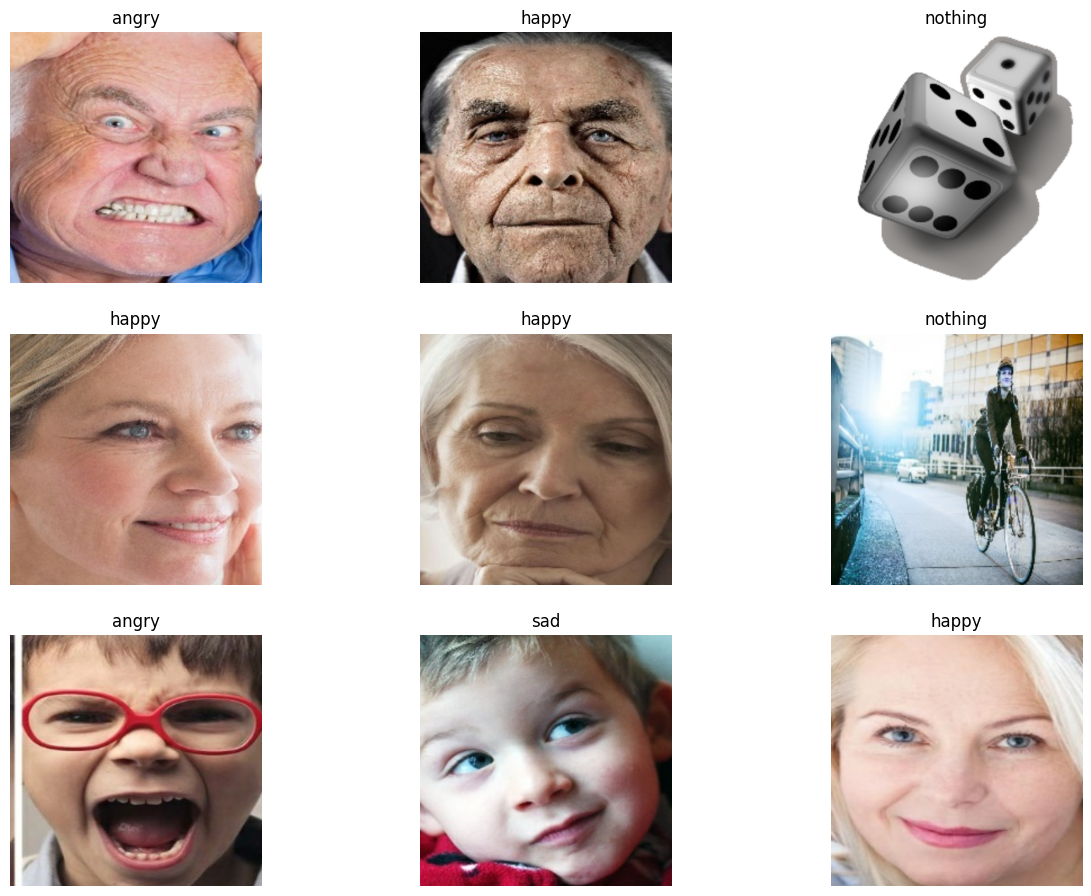

In [40]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in train_ds.take(5):
    for i in range(9):
        plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

**Streamlining Data Preparation with Roboflow**

This project leverages Roboflow's robust capabilities for data preprocessing and data augmentation, ensuring a well-conditioned dataset for optimal model performance.

* **Preprocessing:**
    * Standardized image dimensions for efficient model training.
    * Adjustments like grayscale conversion or contrast normalization for consistency.
    * Potential for object isolation or background removal for focused learning.

* **Data Augmentation:**
    * Artificial variations of existing images to increase dataset size and diversity.
    * Techniques like random cropping, flipping, rotation, and noise injection to simulate real-world variations.
    * Enhanced model generalizability and robustness to unseen data.

By employing Roboflow's user-friendly interface, we've streamlined the data preparation process, saving valuable time and resources. This well-prepared dataset lays the foundation for a superior machine learning model.

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="N2QqLQ80V3STeewhwzK0")
project = rf.workspace("emmo").project("human_emmotion")
version = project.version(1)
dataset = version.download("clip")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to human_emmotion-1 in clip:: 100%|████████████████| 9038/9038 [00:20<00:00, 447.92it/s]


# Modelling

**Harnessing YOLOv8 for Emotion Classification**

This project delves into the application of YOLOv8 for emotion classification. 

* **YOLOv8:**
    * Powerful object detection framework with facial recognition capabilities.
    * Detects and isolates faces within images, enabling emotion analysis.
    * Can be customized to classify specific emotions based on facial feature extraction and classification layers.  

By leveraging YOLOv8's object detection prowess for faces and incorporating emotion classification layers, this project aims to achieve accurate identification of emotions from images. 

In [1]:
from ultralytics import YOLO
model = YOLO("yolov8n-cls.pt")

100%|██████████████████████████████████████████████████████████████████████████████| 5.30M/5.30M [00:09<00:00, 559kB/s]


In [6]:
model.train(data = r"human_emmotion-1" , epochs =50)

New https://pypi.org/project/ultralytics/8.1.34 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.29 🚀 Python-3.10.11 torch-2.2.1+cpu CPU (11th Gen Intel Core(TM) i5-11300H 3.10GHz)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=human_emmotion-1, epochs=50, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

train: Scanning C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\human_emmotion-1\train... 8325 images, 0 corrupt


train: New cache created: C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\human_emmotion-1\train.cache


val: Scanning C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\human_emmotion-1\test... 348 images, 0 corrupt: 10


val: New cache created: C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\human_emmotion-1\test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs\classify\train2
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:17<00:00,  1.59s/it]

                   all      0.908          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:09<00:00,  1.21it/s]

                   all      0.905          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:08<00:00,  1.25it/s]

                   all      0.891          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]

                   all      0.853          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]

                   all      0.879          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50         0G     0.2823          5        224: 100%|██████████| 521/521 [06:56<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50         0G     0.2834          5        224: 100%|██████████| 521/521 [06:56<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50         0G     0.2683          5        224: 100%|██████████| 521/521 [05:40<00:00,  1.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all      0.885          1

      Epoch    GPU_mem       loss  Instances       Size



      13/50         0G      0.253          5        224: 100%|██████████| 521/521 [04:37<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50         0G     0.2535          5        224: 100%|██████████| 521/521 [04:37<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50         0G     0.2407          5        224: 100%|██████████| 521/521 [04:37<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all      0.874          1

      Epoch    GPU_mem       loss  Instances       Size



      16/50         0G     0.2264          5        224: 100%|██████████| 521/521 [04:37<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50         0G     0.2097          5        224: 100%|██████████| 521/521 [04:37<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50         0G     0.2013          5        224: 100%|██████████| 521/521 [04:38<00:00,  1.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50         0G     0.1969          5        224: 100%|██████████| 521/521 [04:35<00:00,  1.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50         0G     0.2022          5        224: 100%|██████████| 521/521 [04:34<00:00,  1.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all      0.871          1

      Epoch    GPU_mem       loss  Instances       Size



      21/50         0G     0.1847          5        224: 100%|██████████| 521/521 [04:35<00:00,  1.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]

                   all      0.882          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50         0G     0.1766          5        224: 100%|██████████| 521/521 [04:34<00:00,  1.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all      0.882          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50         0G     0.1684          5        224: 100%|██████████| 521/521 [04:34<00:00,  1.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50         0G     0.1705          5        224: 100%|██████████| 521/521 [04:37<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50         0G     0.1625          5        224: 100%|██████████| 521/521 [04:34<00:00,  1.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50         0G     0.1505          5        224: 100%|██████████| 521/521 [04:36<00:00,  1.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50         0G     0.1489          5        224: 100%|██████████| 521/521 [04:40<00:00,  1.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50         0G     0.1499          5        224: 100%|██████████| 521/521 [04:36<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50         0G     0.1485          5        224: 100%|██████████| 521/521 [04:35<00:00,  1.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  2.16it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50         0G     0.1352          5        224: 100%|██████████| 521/521 [04:38<00:00,  1.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50         0G     0.1425          5        224: 100%|██████████| 521/521 [04:37<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50         0G     0.1249          5        224: 100%|██████████| 521/521 [04:34<00:00,  1.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50         0G     0.1215          5        224: 100%|██████████| 521/521 [04:36<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50         0G     0.1199          5        224: 100%|██████████| 521/521 [04:34<00:00,  1.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all      0.879          1

      Epoch    GPU_mem       loss  Instances       Size



      35/50         0G     0.1147          5        224: 100%|██████████| 521/521 [04:35<00:00,  1.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all      0.885          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50         0G      0.109          5        224: 100%|██████████| 521/521 [04:34<00:00,  1.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all      0.874          1

      Epoch    GPU_mem       loss  Instances       Size



      37/50         0G     0.1058          5        224: 100%|██████████| 521/521 [04:35<00:00,  1.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50         0G     0.1029          5        224: 100%|██████████| 521/521 [04:29<00:00,  1.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all      0.879          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50         0G    0.09994          5        224: 100%|██████████| 521/521 [04:31<00:00,  1.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50         0G     0.0961          5        224: 100%|██████████| 521/521 [04:35<00:00,  1.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all      0.879          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50         0G     0.0996          5        224: 100%|██████████| 521/521 [04:35<00:00,  1.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50         0G     0.0965          5        224: 100%|██████████| 521/521 [04:35<00:00,  1.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all      0.853          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50         0G    0.09583          5        224: 100%|██████████| 521/521 [04:35<00:00,  1.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50         0G    0.09209          5        224: 100%|██████████| 521/521 [04:32<00:00,  1.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50         0G    0.09171          5        224: 100%|██████████| 521/521 [04:36<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50         0G    0.08352          5        224: 100%|██████████| 521/521 [04:40<00:00,  1.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50         0G    0.08048          5        224: 100%|██████████| 521/521 [04:38<00:00,  1.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50         0G    0.07895          5        224: 100%|██████████| 521/521 [04:37<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50         0G    0.08348          5        224: 100%|██████████| 521/521 [04:36<00:00,  1.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50         0G    0.07728          5        224: 100%|██████████| 521/521 [04:34<00:00,  1.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all      0.862          1



50 epochs completed in 4.569 hours.
Optimizer stripped from runs\classify\train2\weights\last.pt, 3.0MB
Optimizer stripped from runs\classify\train2\weights\best.pt, 3.0MB

Validating runs\classify\train2\weights\best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.11 torch-2.2.1+cpu CPU (11th Gen Intel Core(TM) i5-11300H 3.10GHz)
YOLOv8n-cls summary (fused): 73 layers, 1440004 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\human_emmotion-1\train... found 8325 images in 4 classes ✅ 
val: None...
test: C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\human_emmotion-1\test... found 348 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]


                   all      0.908          1
Speed: 0.0ms preprocess, 7.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train2
Results saved to runs\classify\train2


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002AE17BFC3D0>
curves: []
curves_results: []
fitness: 0.9540229737758636
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9080459475517273, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9540229737758636}
save_dir: WindowsPath('runs/classify/train2')
speed: {'preprocess': 0.0, 'inference': 7.118260723420943, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.9080459475517273
top5: 1.0

## Model Result's

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
results_path = "runs/classify/train2/results.csv"

In [11]:
results = pd.read_csv(results_path)

In [12]:
results

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.51961,0.90805,1,0.85712,0.000238,0.000238,0.000238
1,2,0.43373,0.90517,1,0.85970,0.000466,0.000466,0.000466
2,3,0.40948,0.89080,1,0.88379,0.000685,0.000685,0.000685
3,4,0.40097,0.87356,1,0.88995,0.000672,0.000672,0.000672
4,5,0.36793,0.89655,1,0.87787,0.000672,0.000672,0.000672
5,6,0.34304,0.85345,1,0.89685,0.000657,0.000657,0.000657
6,7,0.33800,0.87931,1,0.87841,0.000643,0.000643,0.000643
7,8,0.31395,0.85920,1,0.88460,0.000629,0.000629,0.000629
8,9,0.30225,0.86494,1,0.88502,0.000615,0.000615,0.000615
9,10,0.28233,0.87644,1,0.87919,0.000601,0.000601,0.000601


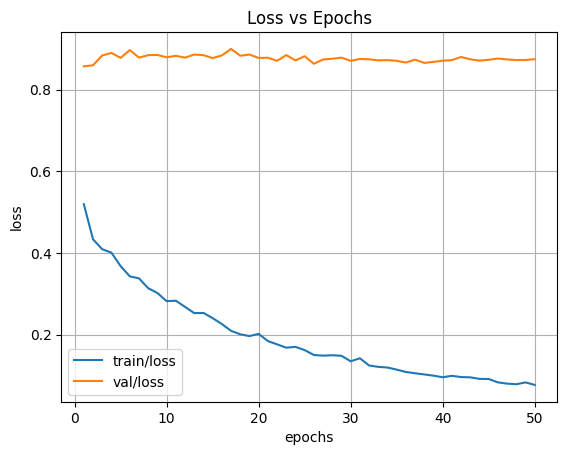

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train/loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val/loss')
plt.grid()
plt.title('Loss vs Epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

plt.show()


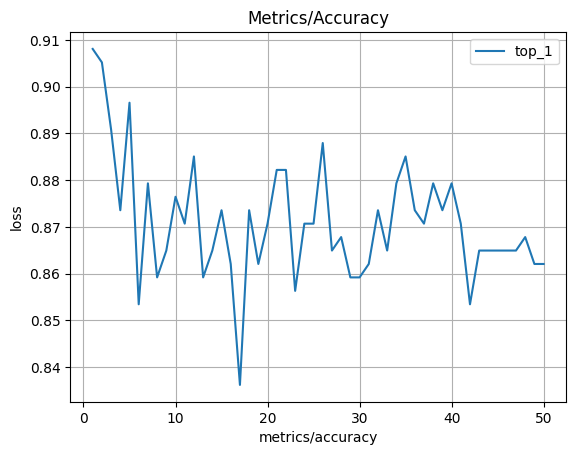

In [36]:
plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'], label =  'top_1')
plt.grid()
plt.title('Metrics/Accuracy')
plt.ylabel('loss')
plt.xlabel('metrics/accuracy')
plt.legend()
plt.show()

In [61]:
import numpy as np
result = model.predict(source = "human_emmotion-1/test/happy/112_jpg.rf.04fdb5f724e90979af2c0c7c661dcd75.jpg")
img = plt.imread("human_emmotion-1/test/happy/112_jpg.rf.04fdb5f724e90979af2c0c7c661dcd75.jpg")


image 1/1 C:\Users\Satoshi\OneDrive\Desktop\mini-projects\Images\human_emmotion-1\test\happy\112_jpg.rf.04fdb5f724e90979af2c0c7c661dcd75.jpg: 224x224 happy 1.00, angry 0.00, sad 0.00, nothing 0.00, 45.8ms
Speed: 6.4ms preprocess, 45.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


predicted class is :  happy


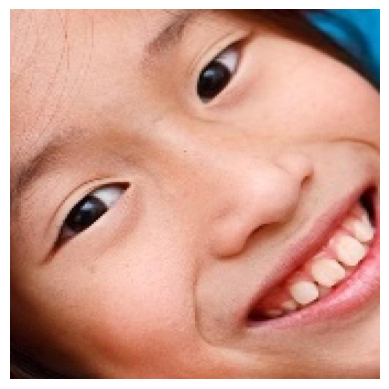

In [63]:
plt.imshow(img)
plt.axis('off')
print('predicted class is : ',class_names[np.argmax(result[0].probs.data)])